# Report Visualizations

These code snippets will report the observations. We will use them to run the 3 questions asked in the Common Analysis.

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Produce a histogram showing the number of fires occurring every 50 mile distance from your assigned city up to the max specified distance.

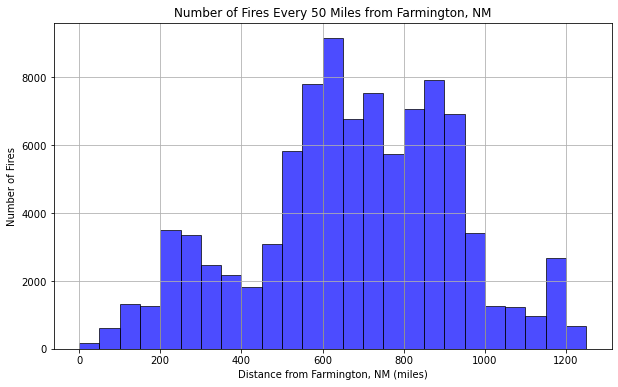

In [2]:
# We will use the fire dataset with distance in it, after filtering for fires within 1250 miles between 1963 & 2020
# This data has all fire types and is not filtered for Wildfires only
fire_data = pd.read_csv('C:/Users/adith/Documents/data-512-common-analysis/intermediate/finalfiresdata.csv')  

# Create a histogram of the 'shortest_dist' column
plt.figure(figsize=(10, 6))
plt.hist(fire_data['shortest_dist'], bins=range(0, 1251, 50), alpha=0.7, color='blue', edgecolor='black')
plt.title('Number of Fires Every 50 Miles from Farmington, NM')
plt.xlabel('Distance from Farmington, NM (miles)')
plt.ylabel('Number of Fires')
plt.grid(True)
plt.show()


# Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.

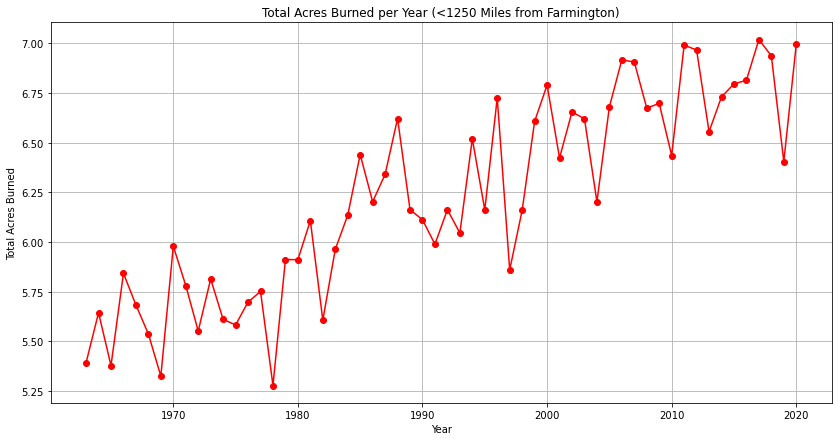

In [3]:
# Group the data by 'FireYear' and sum 'GISAcres' for total acres burned per year
# Using the same data as above
acres_per_year = fire_data.groupby('FireYear')['GISAcres'].sum().reset_index()

# Create a time series plot of the total acres burned per year
plt.figure(figsize=(14, 7))

# Apply scaling to the y-axis (logarithmic base 10 scale)
plt.plot(acres_per_year['FireYear'], np.log10(acres_per_year['GISAcres']), marker='o', linestyle='-', color='red')
plt.title('Total Acres Burned per Year (<1250 Miles from Farmington)')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned')
plt.grid(True)
plt.show()


# Produce a time series graph containing your fire smoke estimate for your city and the AQI estimate for your city.

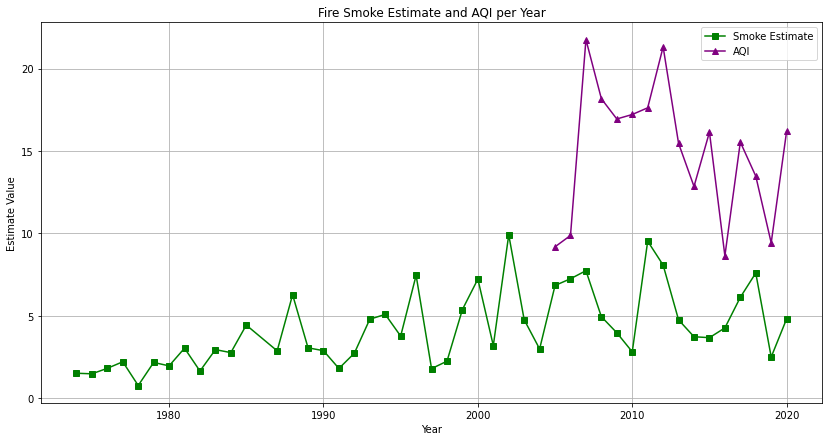

In [4]:
# Loading in the smoke estimates and AQI data
smoke_est = pd.read_csv('C:/Users/adith/Documents/data-512-common-analysis/intermediate/annual_smoke_estimate.csv')
aqi_est = pd.read_csv('C:/Users/adith/Documents/data-512-common-analysis/intermediate/yearly_aqi.csv')

combined_data = pd.merge(left = smoke_est, right = aqi_est, how = "inner", left_on = 'FireYear', right_on = 'year')

# Now plot the time series graph
plt.figure(figsize=(14, 7))
plt.plot(combined_data['FireYear'], combined_data['SmokeEstimate'], marker='s', linestyle='-', color='green', label='Smoke Estimate')
plt.plot(combined_data['FireYear'], combined_data['yearly_avg_aqi'], marker='^', linestyle='-', color='purple', label='AQI')
plt.title('Fire Smoke Estimate and AQI per Year')
plt.xlabel('Year')
plt.ylabel('Estimate Value')
plt.legend()
plt.grid(True)
plt.show()


The pdf file named "Step 3 Report" will have detailed explanations.